## Import libraries

In [1]:
print("load libraries")
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# https://stackoverflow.com/a/34306306/4126114
np.random.seed(0)

load libraries


## Generate data

X [[ 0.10242552  0.09185967  3.07183145  1.85883572  0.21465165]
 [ 0.24820614  0.31170056  2.95905104  1.98183222  0.14940105]
 [ 0.1865945   0.40559478  3.01359996  1.92462169  0.31103611]
 [ 0.2834895   0.8795483   2.9467192   1.8113605   0.58085973]
 [ 0.33492858  0.83318122  3.05714314  1.91918869  0.61340445]
 [ 0.59957718  0.89834491  3.07728118  2.01301631  0.76836816]
 [ 0.51018085  1.00529872  3.12203944  1.89748453  0.98372123]
 [ 0.62949715  1.31340099  2.85648658  1.95607348  1.14942031]
 [ 0.68772206  1.53545732  3.18485407  1.96611832  0.99025789]
 [ 0.5711882   1.43392126  2.89906759  2.00302567  0.90849536]]


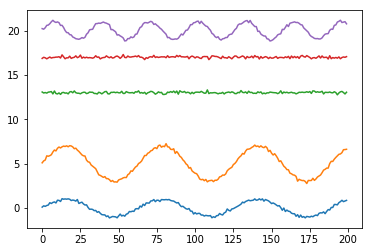

In [8]:
N=100000
X = np.zeros(shape=(N,5))
# X[:,0] = 2*np.ones(shape=(N,))
# X[:,1] = 3*np.ones(shape=(N,))
# X[:,2] = 4*np.ones(shape=(N,))
sigma = 0.1
xt=np.arange(0,N/10,1/10)
X[:,0] = 1*np.sin(1*xt) + np.random.normal(0, sigma, N) # first sine wave
X[:,1] = 2*np.sin(1*xt) + np.random.normal(0, sigma, N) # close duplicate of col above
X[:,2] = np.random.normal(3, sigma, N) # first flat
X[:,3] = np.random.normal(2, sigma, N) # close duplicate of col above
X[:,4] = np.sin(2*xt) + np.random.normal(0, sigma, N) # second sine wave of new frequency


print('X',X[0:10,:])

# plot
from matplotlib import pyplot as plt
def myPlot(X):
    X_plt = X+5*np.arange(X.shape[1])
    N_PLOT=200
    plt.plot(X_plt[0:N_PLOT,:])
    plt.show()
    
myPlot(X)

## PCA with dimensionality reduction

PCA MLE
X_pca [[ 0.12703476 -0.21418575]
 [ 0.38887821 -0.14906052]
 [ 0.44524491 -0.31072426]
 [ 0.91235744 -0.58076462]
 [ 0.89388271 -0.61333739]
 [ 1.07040338 -0.76842966]
 [ 1.12599773 -0.98380237]
 [ 1.45480889 -1.14961789]
 [ 1.67961167 -0.99064605]
 [ 1.53669051 -0.90873661]]


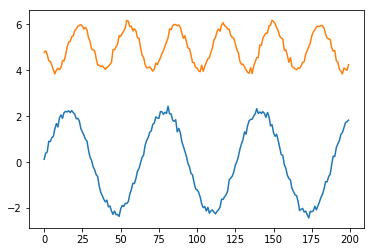

In [9]:
print("PCA MLE")
encoding_dim_pca = 'mle'
pca = PCA(n_components=encoding_dim_pca, random_state=888, svd_solver = 'full')
X_pca = pca.fit_transform(X)
print("X_pca",X_pca[0:10,:])

# plot
myPlot(X_pca)

## PCA without dim reduction (to feed into AE)

PCA
X_pca [[ 0.12703476 -0.21418575  0.06996769  0.03052658 -0.14741964]
 [ 0.38887821 -0.14906052  0.07005254  0.0589548   0.02013855]
 [ 0.44524491 -0.31072426  0.03617847 -0.02903128 -0.06223419]
 [ 0.91235744 -0.58076462  0.10466634 -0.1938187  -0.0963679 ]
 [ 0.89388271 -0.61333739 -0.01036152 -0.07121428 -0.09950805]
 [ 1.07040338 -0.76842966 -0.00380325  0.1499912  -0.04188806]
 [ 1.12599773 -0.98380237 -0.00441602  0.0155017  -0.15848444]
 [ 1.45480889 -1.14961789  0.10927042 -0.07653432  0.07295402]
 [ 1.67961167 -0.99064605 -0.12075073 -0.01940156 -0.15937273]
 [ 1.53669051 -0.90873661  0.00901659 -0.14866739  0.07068392]]


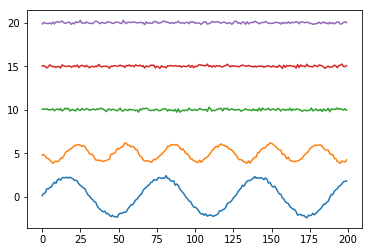

In [10]:
print("PCA")
encoding_dim_pca = X.shape[1] # 'mle'
pca = PCA(n_components=encoding_dim_pca, random_state=888, svd_solver = 'full')
X_pca = pca.fit_transform(X)
print("X_pca",X_pca[0:10,:])

# plot
myPlot(X_pca)

Normalize PCA output

X_pca normalized [[ 0.52018255  0.4196058   0.56880668  0.52666494  0.28726612]
 [ 0.57018896  0.44324987  0.56890228  0.56112235  0.48444887]
 [ 0.58095377  0.38455698  0.53073678  0.45447575  0.38751249]
 [ 0.67016211  0.28651738  0.60790122  0.25473939  0.34734389]
 [ 0.66663384  0.27469166  0.47830075  0.40334636  0.34364856]
 [ 0.70034545  0.21838458  0.48568987  0.67146621  0.41145586]
 [ 0.71096276  0.14019237  0.48499947  0.5084535   0.27424505]
 [ 0.77375854  0.07999215  0.61308858  0.39689803  0.5466022 ]
 [ 0.81669098  0.13770773  0.35392659  0.46614779  0.27319971]
 [ 0.78939615  0.16744539  0.50013383  0.30946661  0.54393074]]


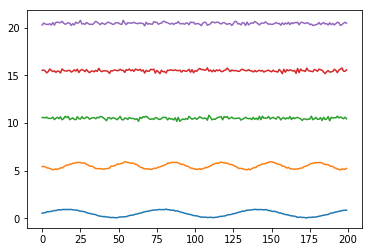

In [11]:
# https://gist.github.com/shadiakiki1986/2c293e364563492c65bffdb6122b4e92
from sklearn.preprocessing import MinMaxScaler #  normalize,
min_max_scaler = MinMaxScaler()
# def myNorm3(X): return normalize(X, norm='l2', axis=0)
def myNorm3(X): return min_max_scaler.fit_transform(X)
X_pca = myNorm3(X_pca)
print("X_pca normalized",X_pca[0:10,:])

# plot
myPlot(X_pca)

## AE with PCA

autoencoder
Train on 80000 samples, validate on 20000 samples
Epoch 1/25
80000/80000 [==============================] - 1s - loss: 0.0427 - val_loss: 0.0404
Epoch 2/25
80000/80000 [==============================] - 1s - loss: 0.0377 - val_loss: 0.0345
Epoch 3/25
80000/80000 [==============================] - 1s - loss: 0.0311 - val_loss: 0.0282
Epoch 4/25
80000/80000 [==============================] - 1s - loss: 0.0258 - val_loss: 0.0235
Epoch 5/25
80000/80000 [==============================] - 1s - loss: 0.0213 - val_loss: 0.0194
Epoch 6/25
80000/80000 [==============================] - 1s - loss: 0.0177 - val_loss: 0.0163
Epoch 7/25
80000/80000 [==============================] - 1s - loss: 0.0149 - val_loss: 0.0136
Epoch 8/25
80000/80000 [==============================] - 1s - loss: 0.0123 - val_loss: 0.0112
Epoch 9/25
80000/80000 [==============================] - 1s - loss: 0.0103 - val_loss: 0.0096
Epoch 10/25
80000/80000 [==============================] - 1s - loss: 0.0091 - val_

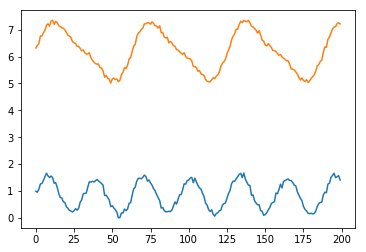

In [14]:
# split
X_train, X_test = train_test_split(X_pca, train_size=0.8, random_state=8888)

# could make wrapper from https://gist.github.com/ktrnka/81c8a7b79cb05c577aab
# and make pipeline
# copied from simple example at https://blog.keras.io/building-autoencoders-in-keras.html
print("autoencoder")
from keras.layers import Input, Dense, Dropout
from keras.models import Model, load_model
from keras.layers.advanced_activations import LeakyReLU #, PReLU

input_img = Input(shape=(X_pca.shape[1],))
encoded = input_img
encoding_dim_ae = 2
# encoded = Dense( encoding_dim_ae, activation='relu' )(encoded)

# hidden layer
encoded = Dense( encoding_dim_ae, activation='linear' )(encoded)

# use leaky relu
# https://github.com/fchollet/keras/issues/117
encoded = LeakyReLU(alpha=.3)(encoded)   # add an advanced activation

# GET DEEP
# encoding_dim2 = 50
# encoding_dim3 = 10
# encoded = Dense(encoding_dim2, activation='relu')(encoded)
# encoded = Dense(encoding_dim3, activation='relu')(encoded)
# decoded = Dense(encoding_dim2, activation='relu')(encoded)

decoded = Dense(X_pca.shape[1], activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

# encoded_input = Input(shape=(encoding_dim_ae,))
# decoder_layer = autoencoder.layers[-1]
# decoder = Model(encoded_input, decoder_layer(encoded_input))

# other: optimizer='adadelta', loss='binary_crossentropy'
autoencoder.compile(optimizer='rmsprop', loss='mean_squared_error')
encoder.compile(optimizer='rmsprop', loss='mean_squared_error')
# decoder.compile(optimizer='rmsprop', loss='mean_squared_error')

# train autoencoder
autoencoder.fit(
  X_train,
  X_train,
  epochs=25, #50,
  batch_size=256,
  shuffle=True,
  validation_data=(
    X_test,
    X_test,
  )
)

print("encoder predict")
X_enc = encoder.predict(X_pca)
# print("encoded",X_enc)
# # X_enc_dec = decoder.predict(X_enc)
# # print("enc-dec",X_enc_dec)
# X_rec = autoencoder.predict(X_pca)
# print("recoded",X_rec)

# plot
# from matplotlib import pyplot as plt
myPlot(X_enc)

## AE without PCA

X normalized [[ 0.54241835  0.50606073  0.60482996  0.38336802  0.58029626]
 [ 0.59631635  0.55198113  0.48340543  0.51153296  0.55662203]
 [ 0.5735373   0.57159376  0.54213529  0.45191839  0.61526648]
 [ 0.60936131  0.67059324  0.47012842  0.33389784  0.7131639 ]
 [ 0.62837936  0.66090807  0.58901586  0.44625709  0.72497178]
 [ 0.72622521  0.67451947  0.61069739  0.54402744  0.78119573]
 [ 0.69317361  0.69686     0.65888617  0.42364089  0.85933014]
 [ 0.73728722  0.76121644  0.37297988  0.48469181  0.9194491 ]
 [ 0.75881413  0.8075996   0.72651526  0.49515874  0.86170177]
 [ 0.71572925  0.78639073  0.41882452  0.53361699  0.83203669]]


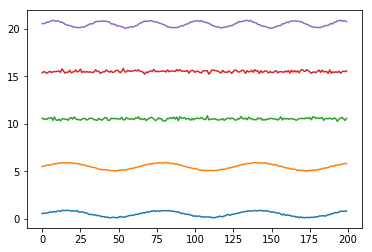

Train on 80000 samples, validate on 20000 samples
Epoch 1/25
80000/80000 [==============================] - 1s - loss: 0.0181 - val_loss: 0.0181
Epoch 2/25
80000/80000 [==============================] - 1s - loss: 0.0178 - val_loss: 0.0177
Epoch 3/25
80000/80000 [==============================] - 1s - loss: 0.0171 - val_loss: 0.0166
Epoch 4/25
80000/80000 [==============================] - 1s - loss: 0.0154 - val_loss: 0.0143
Epoch 5/25
80000/80000 [==============================] - 1s - loss: 0.0126 - val_loss: 0.0111
Epoch 6/25
80000/80000 [==============================] - 2s - loss: 0.0094 - val_loss: 0.0081
Epoch 7/25
80000/80000 [==============================] - 1s - loss: 0.0070 - val_loss: 0.0062
Epoch 8/25
80000/80000 [==============================] - 2s - loss: 0.0056 - val_loss: 0.0053
Epoch 9/25
80000/80000 [==============================] - 1s - loss: 0.0051 - val_loss: 0.0050
Epoch 10/25
80000/80000 [==============================] - 1s - loss: 0.0050 - val_loss: 0.0050

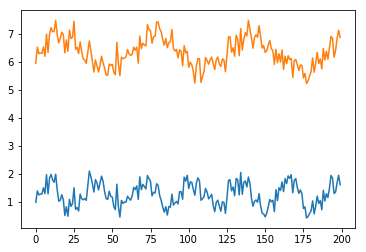

In [15]:
X_norm = myNorm3(X)
print("X normalized",X_norm[0:10,:])

# plot
myPlot(X_norm)

# split
X_train, X_test = train_test_split(X_norm, train_size=0.8, random_state=8888)

# train autoencoder
autoencoder.fit(
  X_train,
  X_train,
  epochs=25, #50,
  batch_size=256,
  shuffle=True,
  validation_data=(
    X_test,
    X_test,
  )
)

print("encoder predict")
X_enc = encoder.predict(X_pca)

myPlot(X_enc)